# integrate〜umap描画、上皮のみ抽出まで

In [1]:
library(Seurat)
library(Matrix)
library(ggplot2)
library(cowplot)
library(dplyr)
library(enrichR)


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
AddGeneSetScore <- function(data.integrated, genes){
    sum.exp <- rowSums(FetchData(object = data.integrated,
                                   vars = genes),
                          na.rm = TRUE)

    if (all(names(x = sum.exp) == rownames(x = data.integrated@meta.data))) {
      cat("Cell names order match in 'mean.exp' and 'object@meta.data':\n", 
          "adding gene set mean expression values in 'object@meta.data$gene.set.score'")
      return (sum.exp)
    }
}

# N totalのみ対象とする

In [116]:
data.list <- c()
data.dirs <- list.files("/data/share/scRNAseq//results/human_STAD/",
                        full.names = TRUE,
                        pattern="N-total")

In [117]:
data.dirs

[1] "/data/share/scRNAseq//results/human_STAD//10N-total"
 [2] "/data/share/scRNAseq//results/human_STAD//11N-total"
 [3] "/data/share/scRNAseq//results/human_STAD//12N-total"
 [4] "/data/share/scRNAseq//results/human_STAD//14N-total"
 [5] "/data/share/scRNAseq//results/human_STAD//15N-total"
 [6] "/data/share/scRNAseq//results/human_STAD//16N-total"
 [7] "/data/share/scRNAseq//results/human_STAD//17N-total"
 [8] "/data/share/scRNAseq//results/human_STAD//18N-total"
 [9] "/data/share/scRNAseq//results/human_STAD//6N-total" 
[10] "/data/share/scRNAseq//results/human_STAD//8N-total" 
[11] "/data/share/scRNAseq//results/human_STAD//9N-total"

In [15]:
data.dirs

[1] "/data/share/scRNAseq//results/human_STAD//10N-total"
 [2] "/data/share/scRNAseq//results/human_STAD//11N-total"
 [3] "/data/share/scRNAseq//results/human_STAD//12N-total"
 [4] "/data/share/scRNAseq//results/human_STAD//14N-total"
 [5] "/data/share/scRNAseq//results/human_STAD//15N-total"
 [6] "/data/share/scRNAseq//results/human_STAD//16N-total"
 [7] "/data/share/scRNAseq//results/human_STAD//17N-total"
 [8] "/data/share/scRNAseq//results/human_STAD//18N-total"
 [9] "/data/share/scRNAseq//results/human_STAD//6N-total" 
[10] "/data/share/scRNAseq//results/human_STAD//8N-total" 
[11] "/data/share/scRNAseq//results/human_STAD//9N-total"

In [122]:
for (i in 1:length(data.dirs)){
    data.list <- c(data.list, Read10X(paste0(data.dirs[i],"/outs/filtered_feature_bc_matrix")))
}

In [124]:
length(data.list)

[1] 11

In [125]:
options(warn=-1)

for (i in 1:length(data.dirs)){
    sample <- strsplit(data.dirs[i], "/")[[1]]
    sample <- sample[length(sample)]
    data.list[[i]] <- CreateSeuratObject(data.list[[i]], project = sample, min.cells = 2)
#    data.list[[i]] <- PercentageFeatureSet(data.list[[i]],pattern = '^MT-', col.name = 'percent.mt')
    data.list[[i]] <- SCTransform(data.list[[i]], verbose = FALSE)
}
options(warn=0)

In [17]:
options(future.globals.maxSize= 10*1024^3)

In [18]:
data.features <- SelectIntegrationFeatures(object.list=data.list, nfeatures=3000)
data.list <- PrepSCTIntegration(object.list=data.list, anchor.features=data.features,
                               verbose=FALSE)

In [19]:
options(warn=-1)
data.anchors <- FindIntegrationAnchors(object.list = data.list, normalization.method = 'SCT',anchor.features=data.features,verbose=FALSE)
options(warn=0)

In [20]:
data.integrated <- IntegrateData(anchorset = data.anchors, normalization.method='SCT',verbose=FALSE)

In [21]:
save(data.integrated, file='Normal-Total-Gastric-Seurat3_1.RData')


In [22]:
1+1

[1] 2

In [5]:
getwd()

[1] "/home/tsubosaka/stomach_normal_marker"

In [3]:
load('Normal-Total-Gastric-Seurat3_1.RData')

In [11]:
data.integrated@assays$

Assay data with 21674 features for 38416 cells
First 10 features:
 AL627309.1, AL669831.5, LINC00115, FAM41C, AL645608.3, AL645608.1,
SAMD11, NOC2L, KLHL17, PLEKHN1 

In [112]:
library(Seurat)
library(Matrix)
library(ggplot2)
library(cowplot)
library(dplyr)
library(enrichR)

In [5]:
reticulate::import(module = "umap")

Module(umap)

In [6]:
# These are now standard steps in the Seurat workflow for visualization and clustering
data.integrated <- RunPCA(data.integrated, verbose = FALSE)

In [8]:
data.integrated <- RunUMAP(data.integrated, dims = 1:30, verbose = FALSE, umap.method = 'umap-learn', metric = 'correlation')

In [9]:
data.integrated <- FindNeighbors(data.integrated, dims = 1:30, verbose = FALSE)
data.integrated <- FindClusters(data.integrated, verbose = FALSE)

In [113]:
data.integrated

An object of class Seurat 
42921 features across 38416 samples within 3 assays 
Active assay: SCT (18247 features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

In [98]:
slotNames(data.integrated)

[1] "assays"       "meta.data"    "active.assay" "active.ident" "graphs"      
 [6] "neighbors"    "reductions"   "project.name" "misc"         "version"     
[11] "commands"     "tools"

In [102]:
data.integrated@active.assay <- 'SCT'

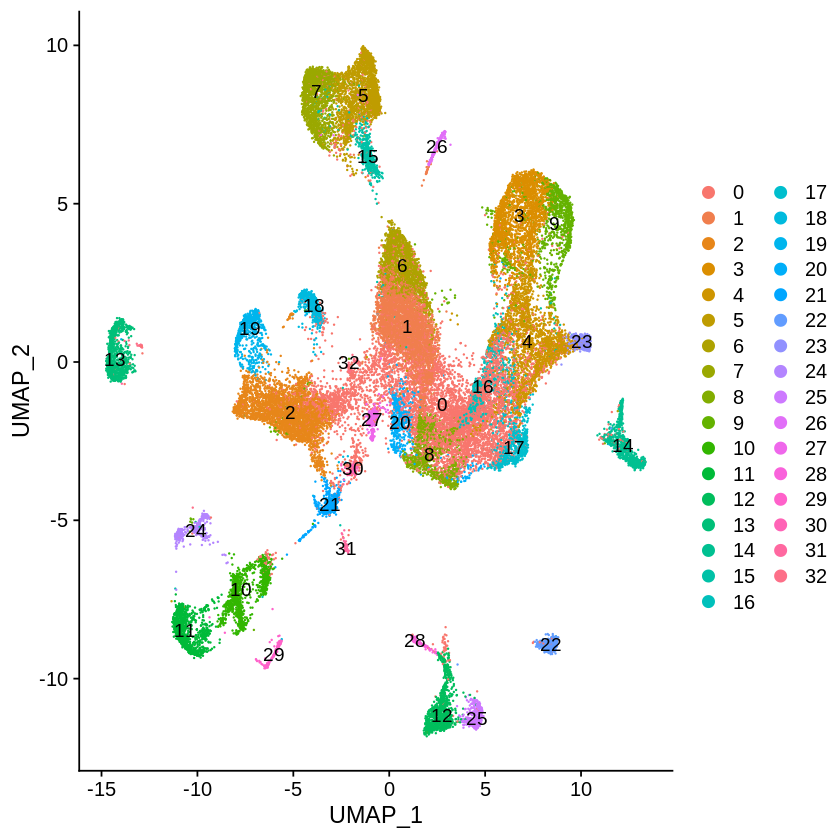

In [103]:
DimPlot(data.integrated, label = TRUE)

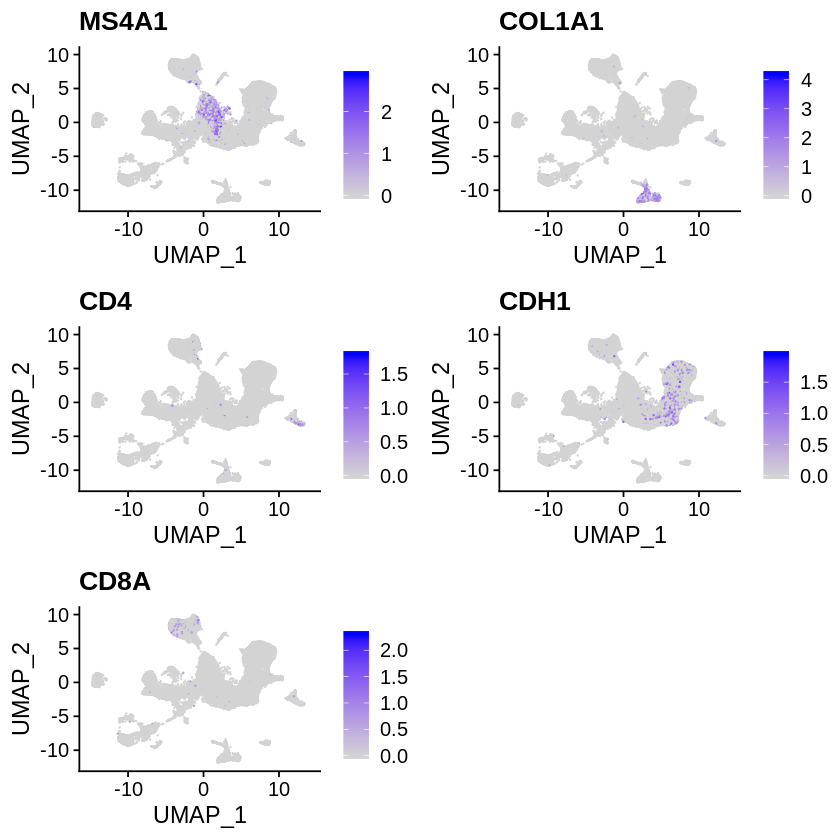

In [106]:
# MS4A1 -> B cell
# COL1A1-> fibroblast
# CD4 -> helper T cell
# CDH1 ->
# CD8A -> killer T cell
FeaturePlot(object = data.integrated, features = c("MS4A1", "COL1A1","CD4","CDH1","CD8A"), ncol = 2)
#, blend = TRUE, ncol = 3)

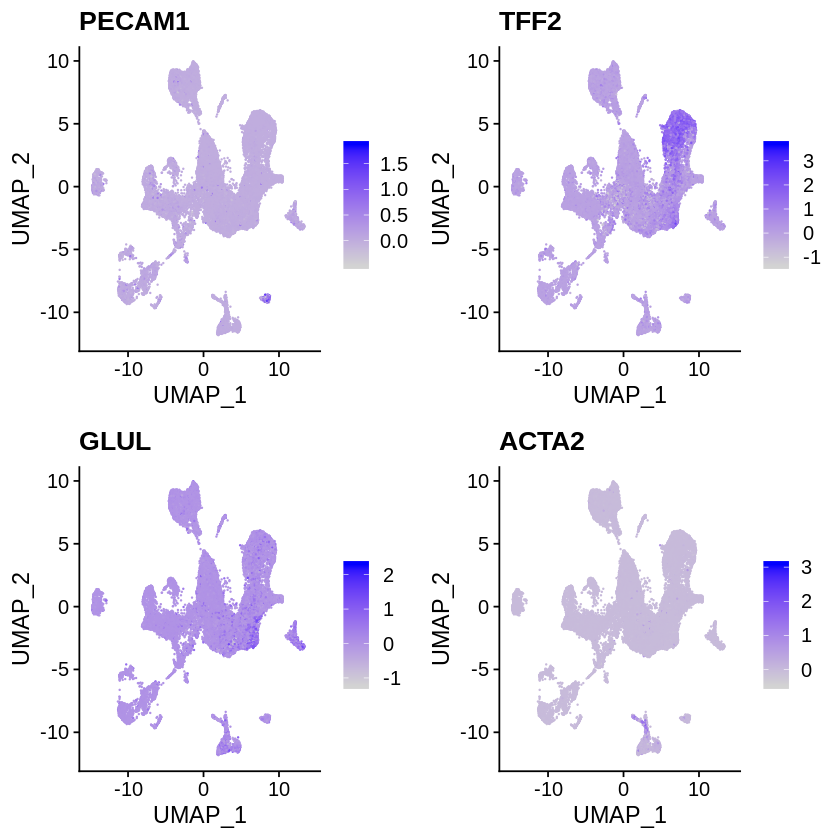

In [16]:
# PECAM1 -> 血管内皮細胞
# VWFもみたい
# TFF2   -> gastric mucosa?
# GLUL   -> グルタミンシンターゼ
# ACTA2  -> 平滑筋
FeaturePlot(object = data.integrated, features = c("PECAM1","TFF2","GLUL","ACTA2"), ncol = 2)

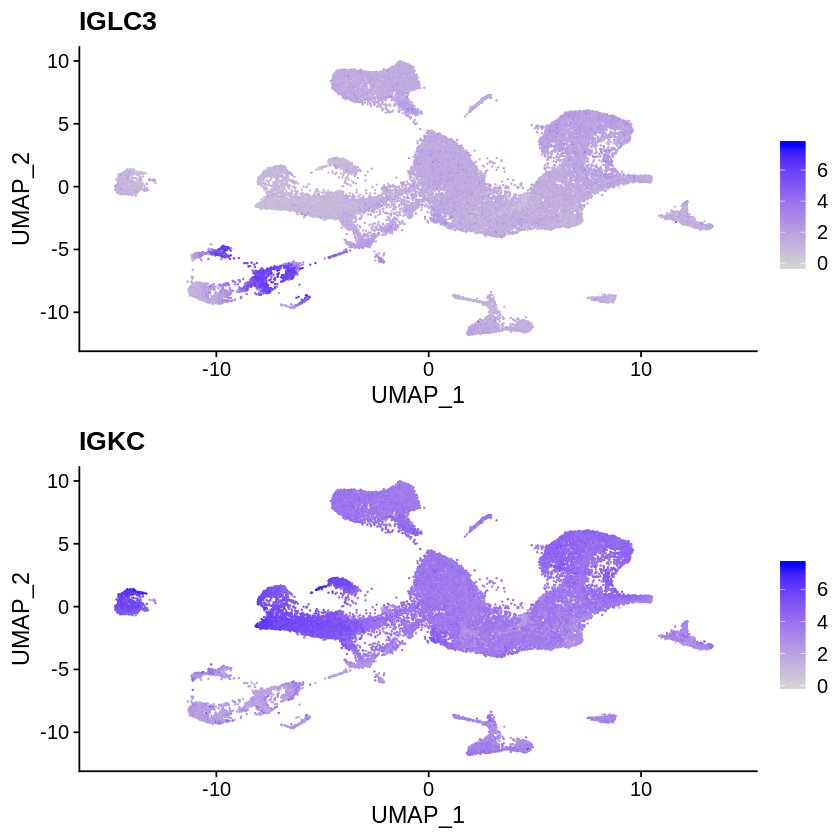

In [17]:
FeaturePlot(object = data.integrated, features = c("IGLC3","IGKC"),ncol=1)

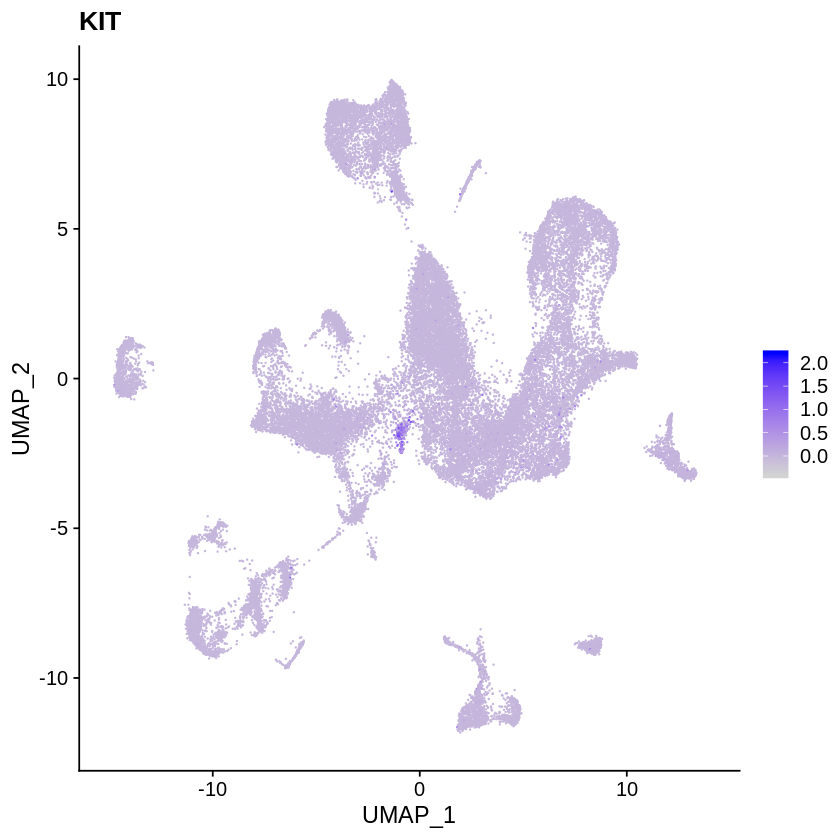

In [18]:
FeaturePlot(object = data.integrated, features = c("KIT"),ncol=2)

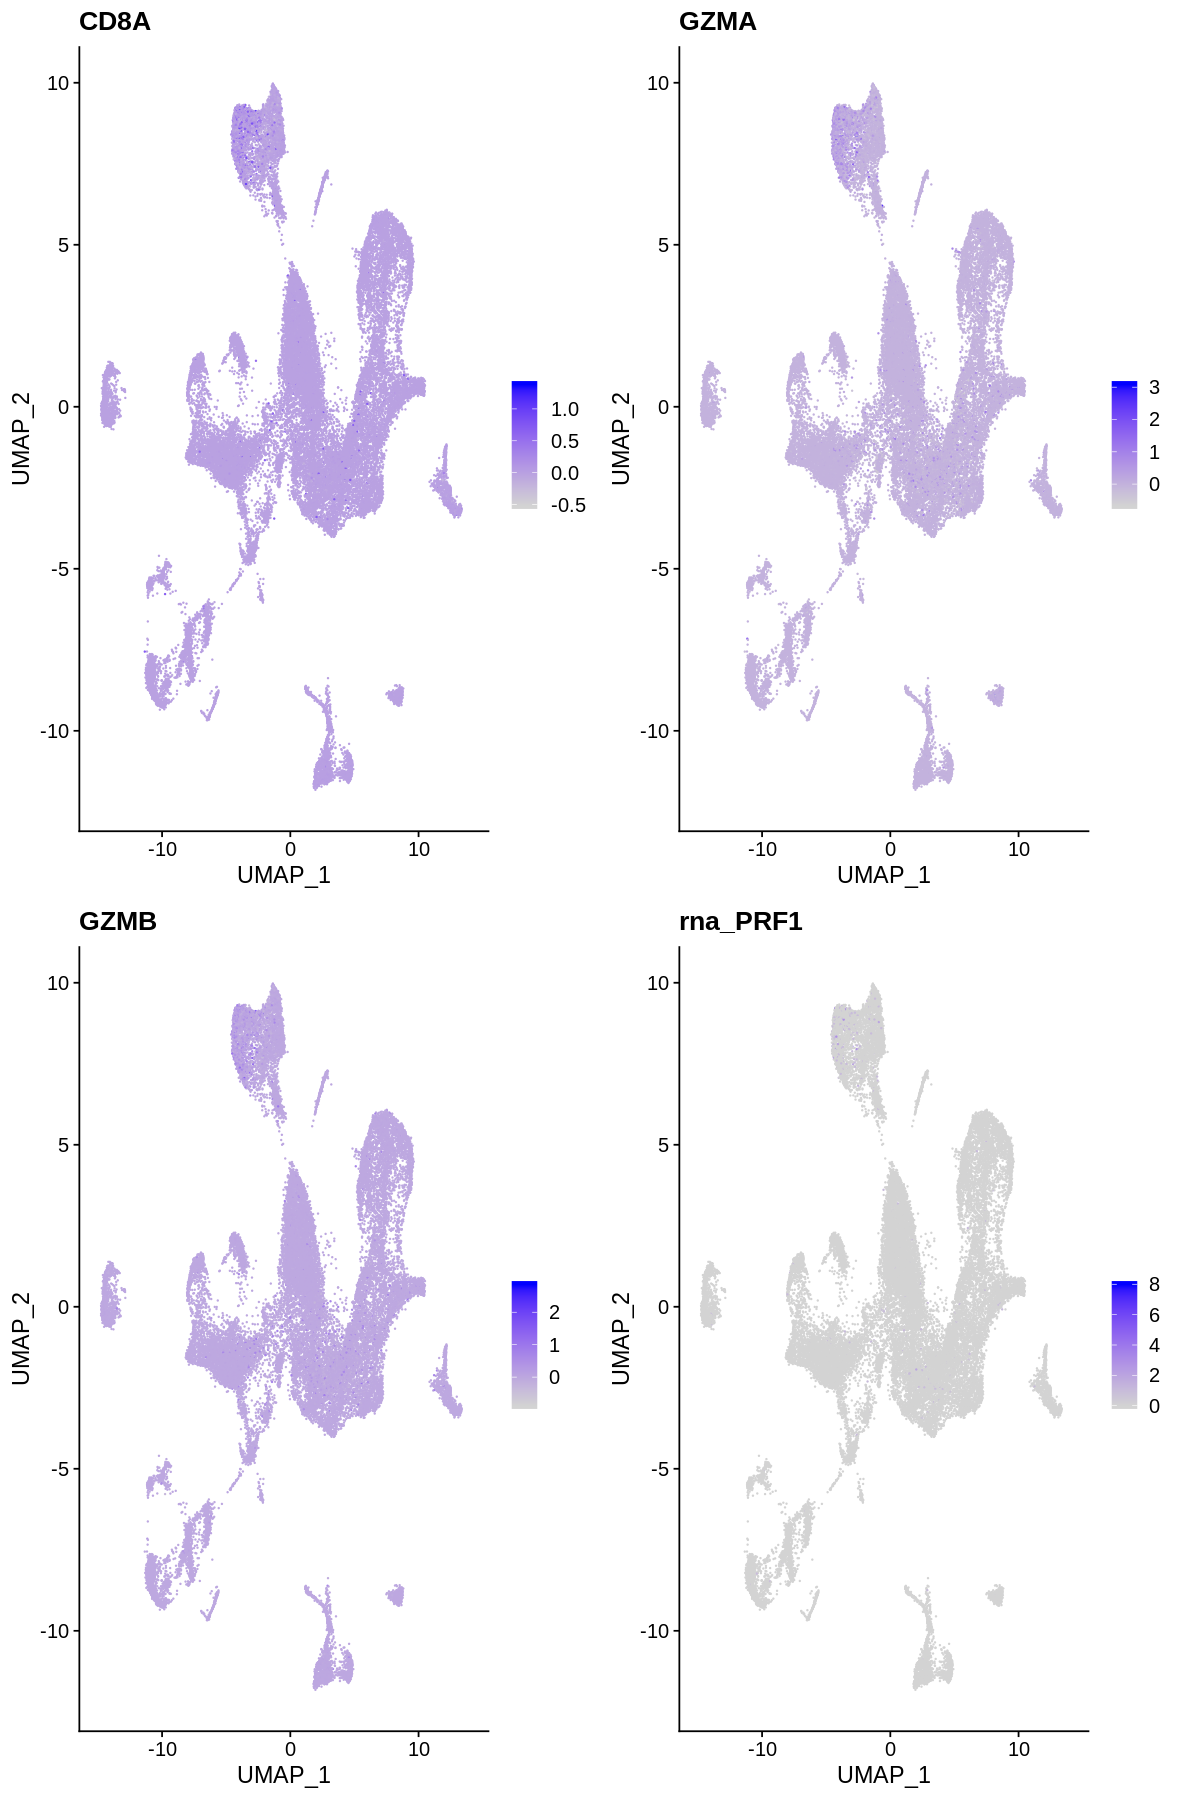

In [35]:
FeaturePlot(object = data.integrated, features = c("CD8A","GZMA","GZMB","rna_PRF1"),ncol=2)

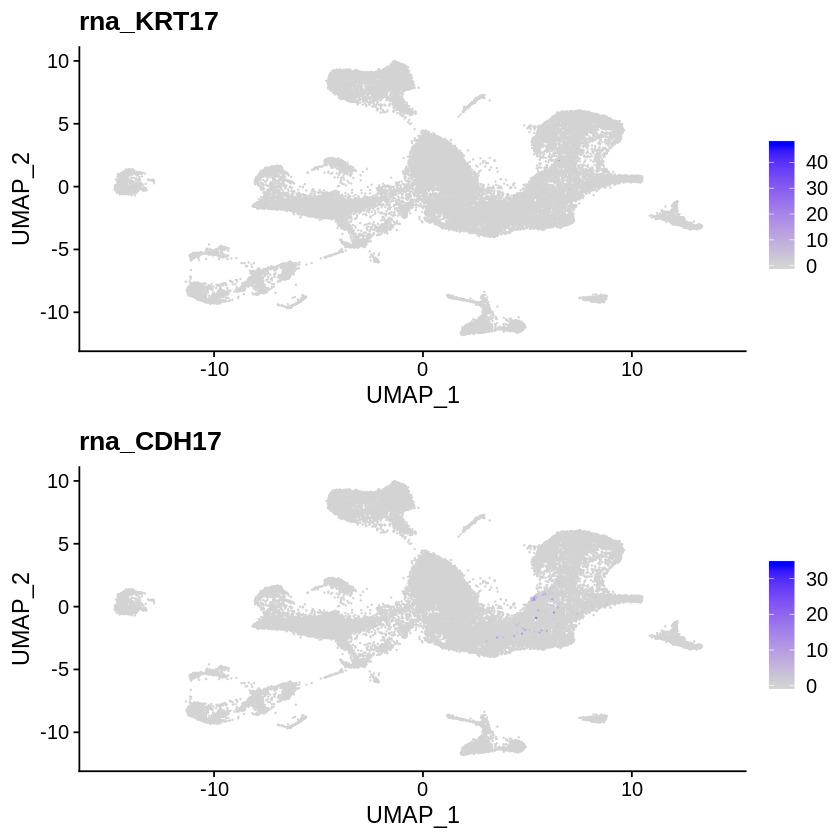

In [21]:
FeaturePlot(object = data.integrated, features = c("rna_KRT17","rna_CDH17"),ncol=1)

Cell names order match in 'mean.exp' and 'object@meta.data':
 adding gene set mean expression values in 'object@meta.data$gene.set.score'Cell names order match in 'mean.exp' and 'object@meta.data':
 adding gene set mean expression values in 'object@meta.data$gene.set.score'Cell names order match in 'mean.exp' and 'object@meta.data':
 adding gene set mean expression values in 'object@meta.data$gene.set.score'

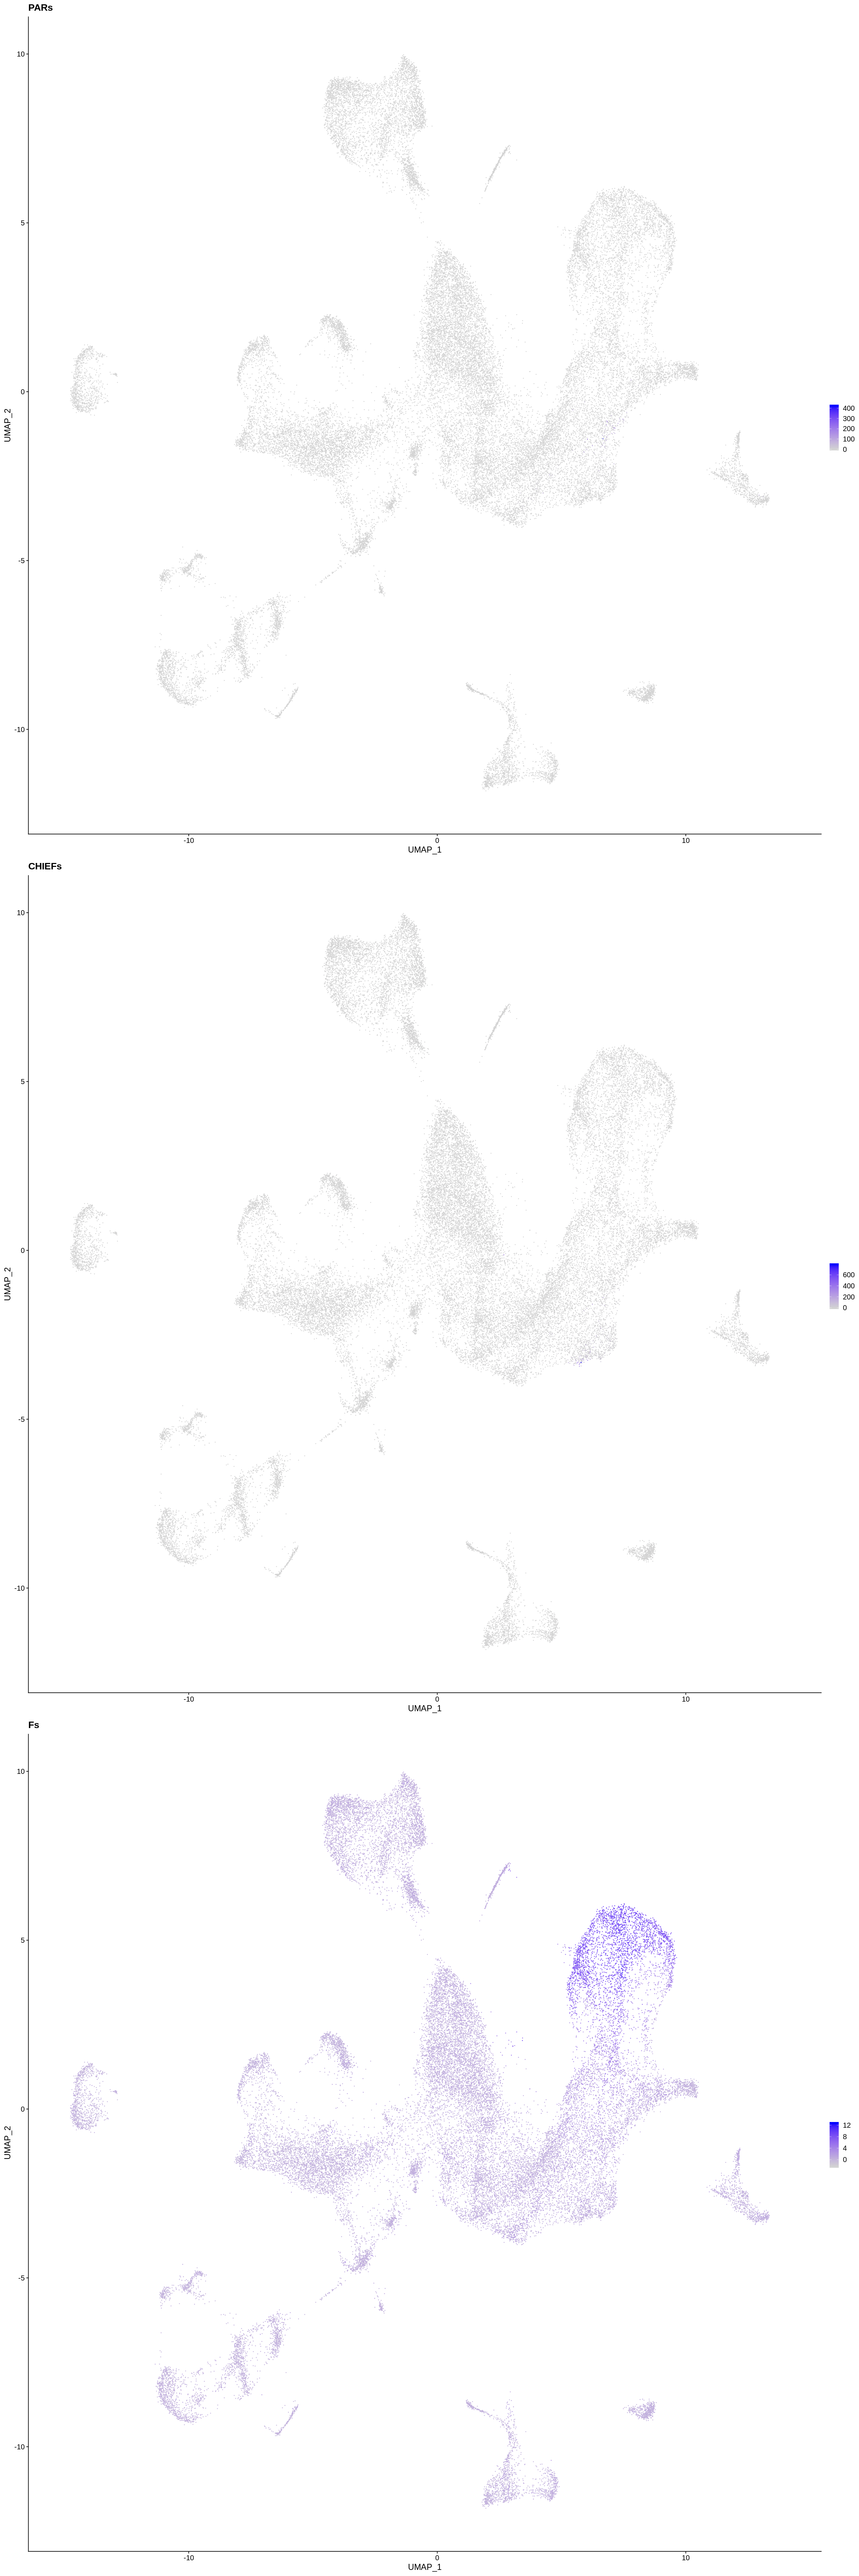

In [39]:
data.integrated$CHIEFs <- AddGeneSetScore(data.integrated,
                                   c("LIPF","PGC","rna_PGA3","rna_PGA4","rna_PGA5"))
data.integrated$PARs <- AddGeneSetScore(data.integrated,
                                   c("rna_ATP4B","rna_GIF"))
data.integrated$Fs <- AddGeneSetScore(data.integrated,
                                   c("GKN1", "PSCA","MUC5AC"))

options(repr.plot.width=20, repr.plot.height=60)
FeaturePlot(object = data.integrated, features = c("PARs","CHIEFs","Fs"), ncol=1, pt.size = 0.1)

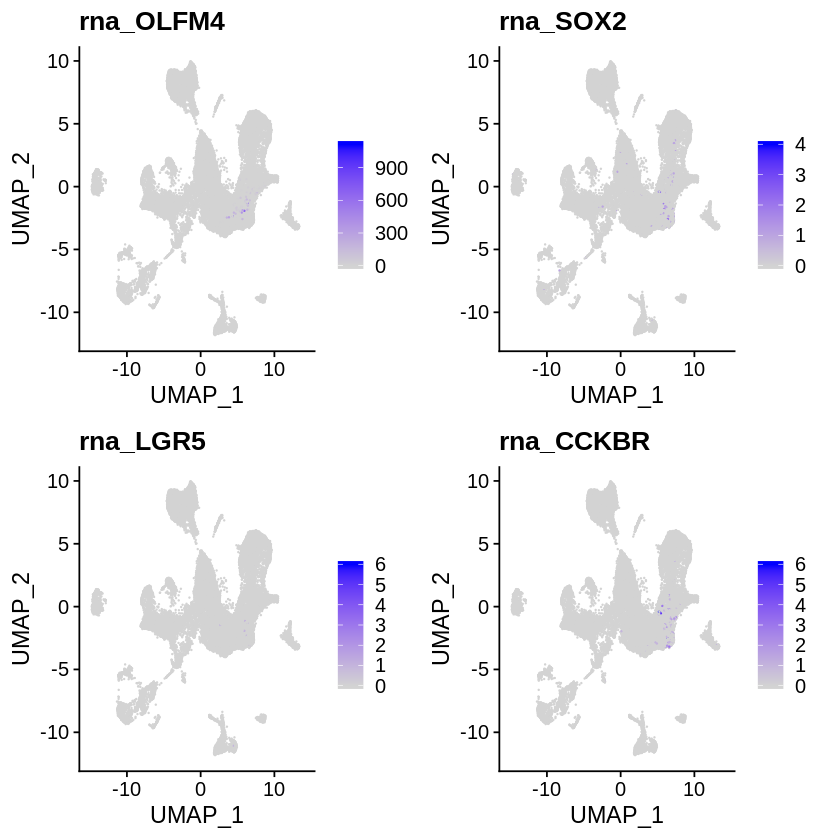

In [22]:
# 腸管細胞
FeaturePlot(object = data.integrated, features = c('rna_OLFM4','rna_SOX2','rna_LGR5','rna_CCKBR'))

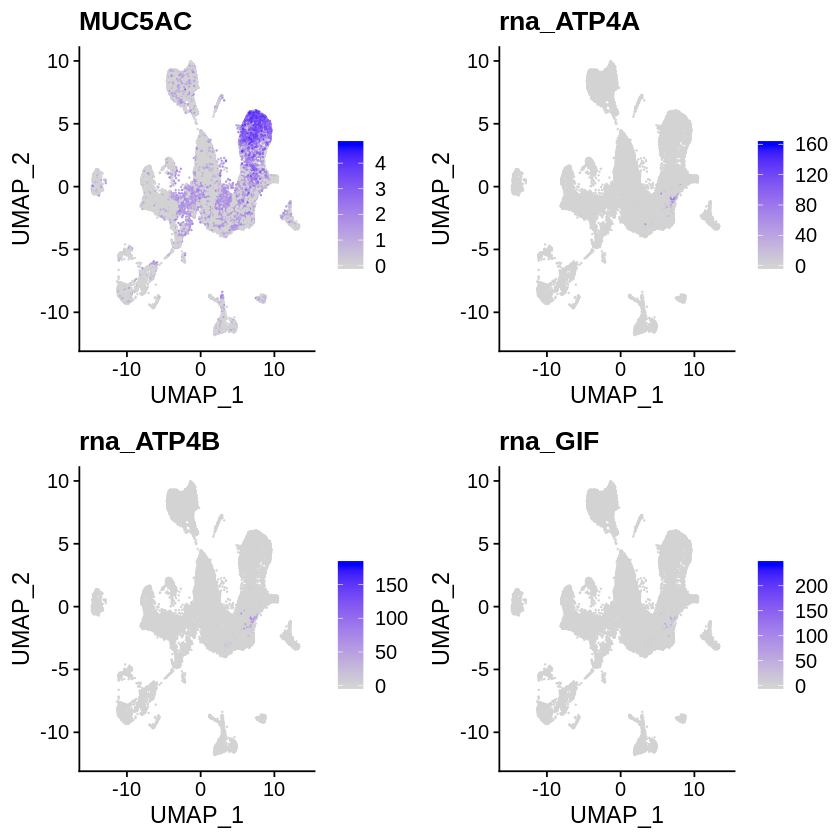

In [107]:
#epithelium
FeaturePlot(object = data.integrated, features = c("MUC5AC",'rna_ATP4A',"rna_ATP4B","rna_GIF"))

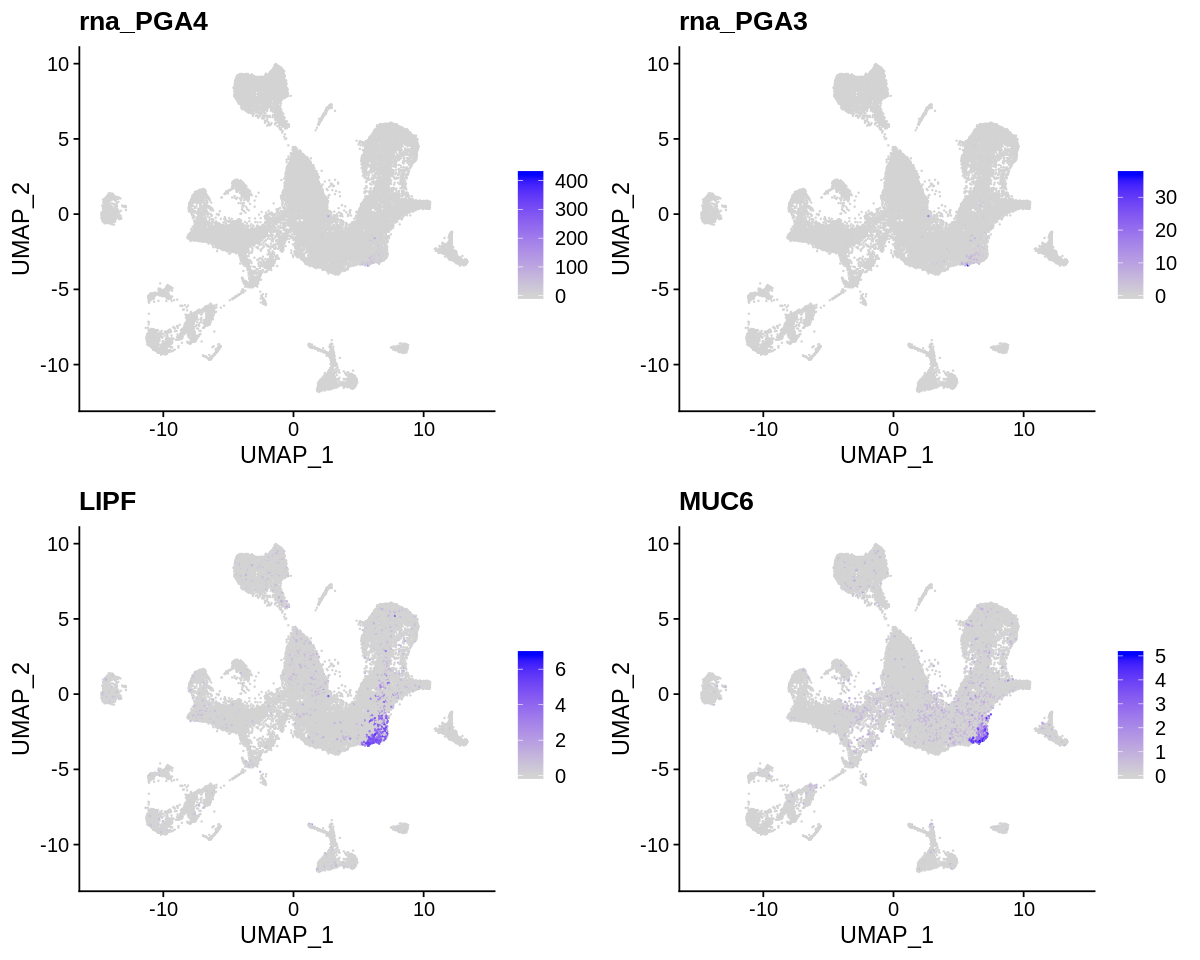

In [108]:
#intestinal metaplasia
options(repr.plot.width=10, repr.plot.height=8)
FeaturePlot(object = data.integrated, features = c('rna_PGA4', "rna_PGA3",'LIPF',"MUC6"), ncol = 2)

Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: rna_TAC1, rna_NEUROG3”

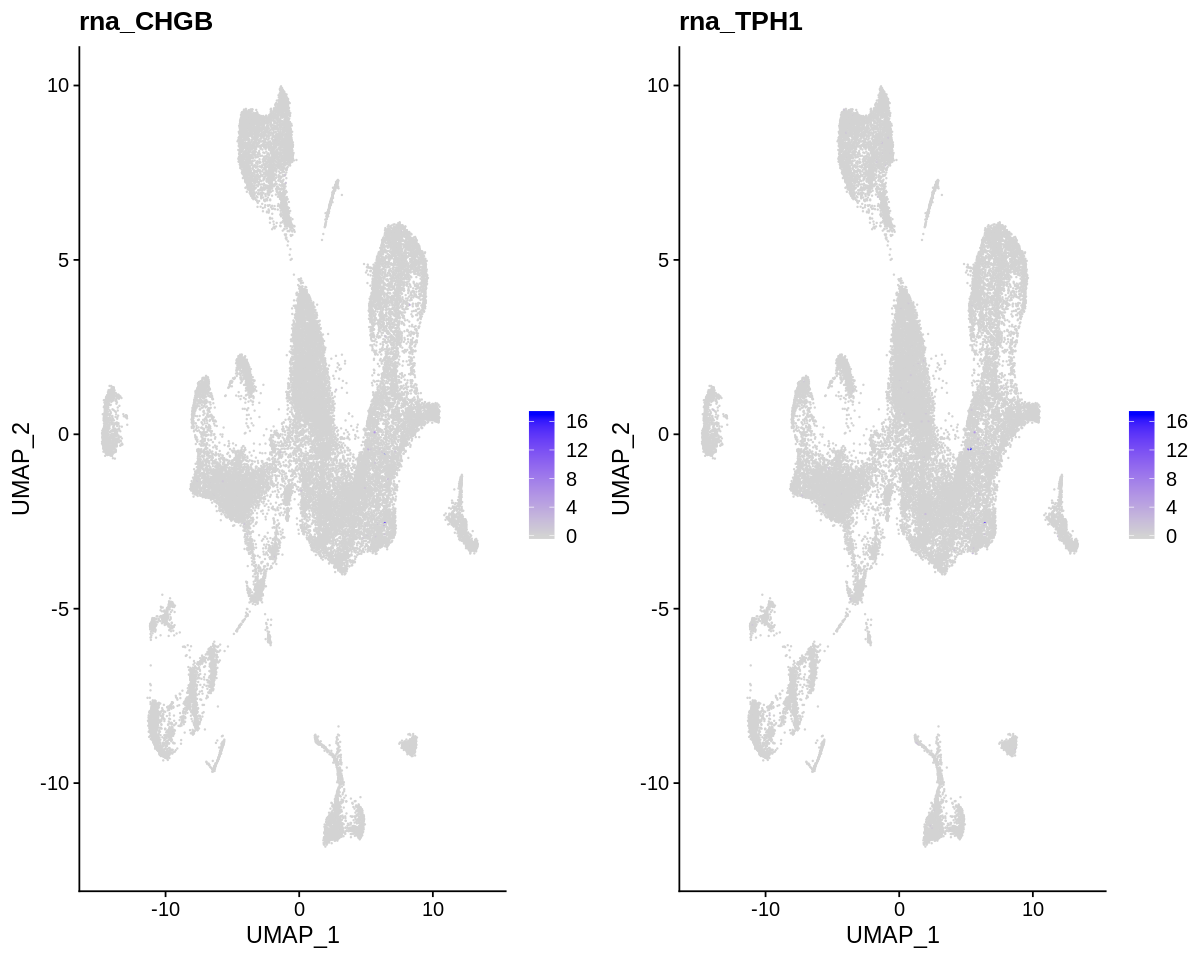

In [28]:
#intestinal metaplasia
options(repr.plot.width=10, repr.plot.height=8)
FeaturePlot(object = data.integrated, features = c('rna_CHGB','rna_TAC1','rna_TPH1','rna_NEUROG3'), ncol = 2)

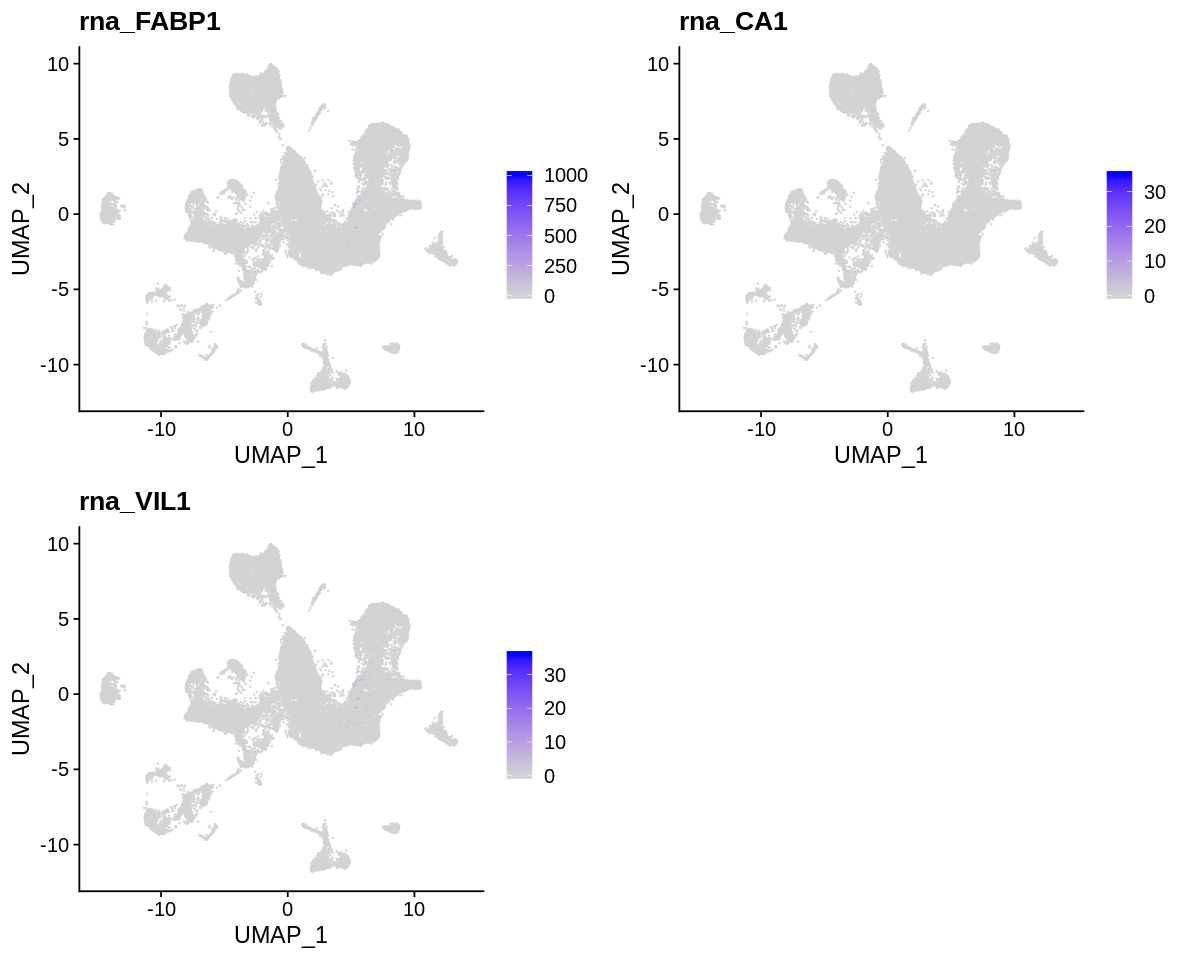

In [29]:
#intestinal metaplasia
options(repr.plot.width=10, repr.plot.height=8)
FeaturePlot(object = data.integrated, features = c('rna_FABP1','rna_CA1','rna_VIL1'), ncol = 2)

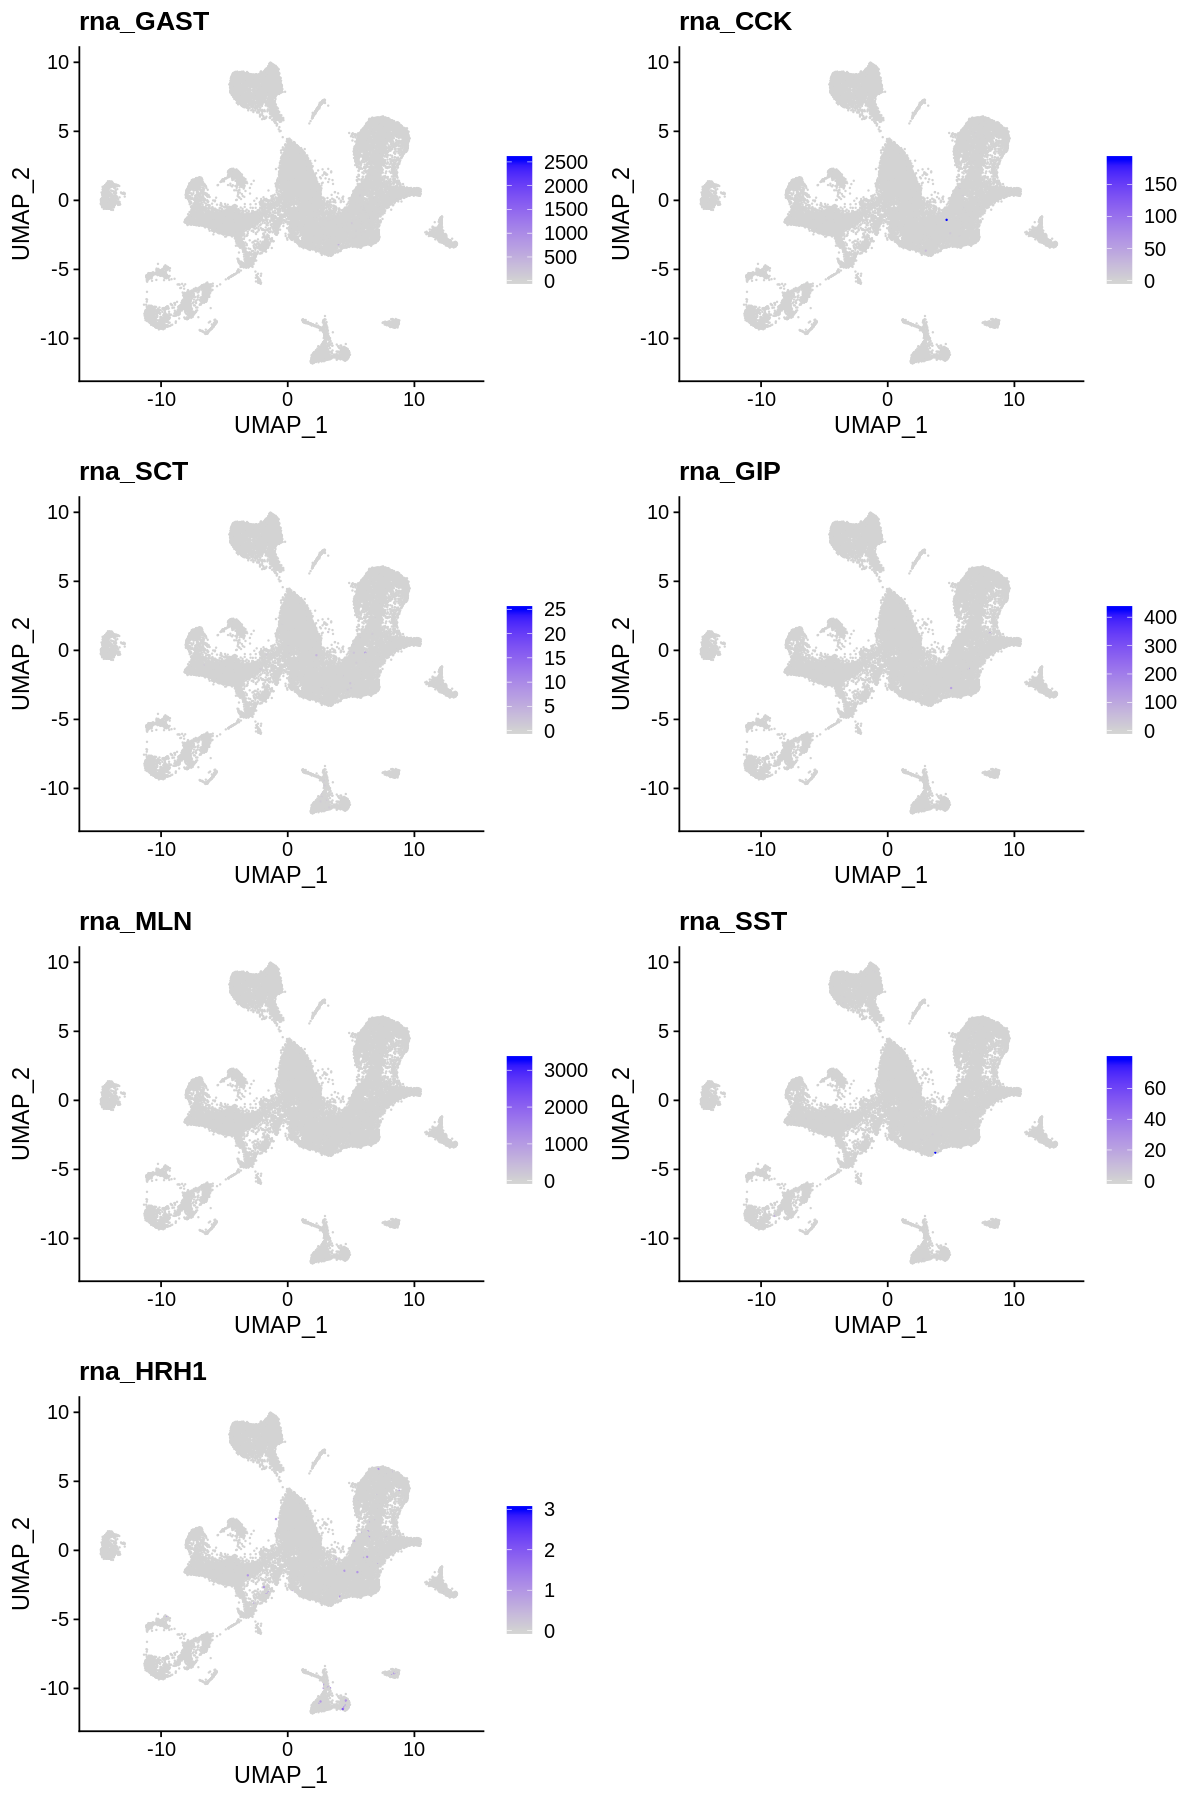

In [30]:
#endocrine
options(repr.plot.width=10, repr.plot.height=15)
FeaturePlot(object = data.integrated, features = c("rna_GAST","rna_CCK","rna_SCT","rna_GIP","rna_MLN","rna_SST","rna_HRH1"), ncol = 2)

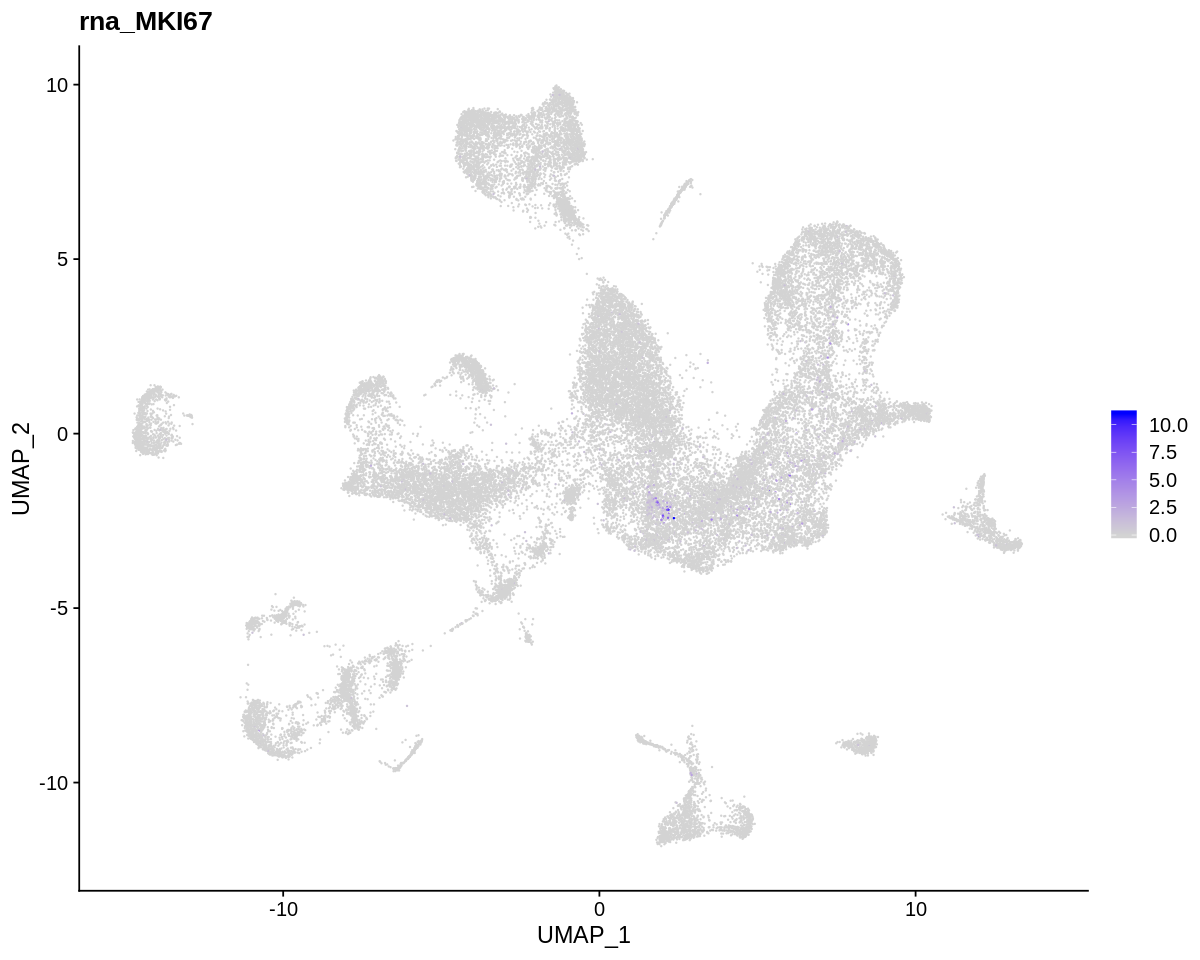

In [109]:
FeaturePlot(object = data.integrated, features = c("rna_MKI67"))

In [110]:
# FindAllMarkers
# The min.pct argument requires a feature to be detected at a minimum percentage in either of the two groups of cells, 
# and the thresh.test argument requires a feature to be differentially expressed (on average) 
# by some amount between the two groups. 
# You can set both of these to 0, but with a dramatic increase in time 
# - since this will test a large number of features that are unlikely to be highly discriminatory. 
# As another option to speed up these computations, max.cells.per.ident can be set. 
# This will downsample each identity class to have no more cells than whatever this is set to. 
# While there is generally going to be a loss in power, 
# the speed increases can be significiant and the most highly differentially expressed features will likely still rise to the top.

# 計算済み
all.markers <- FindAllMarkers(object = data.integrated, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

Calculating cluster 0
Calculating cluster 1
Calculating cluster 2
Calculating cluster 3
Calculating cluster 4
Calculating cluster 5
Calculating cluster 6
Calculating cluster 7
Calculating cluster 8
Calculating cluster 9
Calculating cluster 10
Calculating cluster 11
Calculating cluster 12
Calculating cluster 13
Calculating cluster 14
Calculating cluster 15
Calculating cluster 16
Calculating cluster 17
Calculating cluster 18
Calculating cluster 19
Calculating cluster 20
Calculating cluster 21
Calculating cluster 22
Calculating cluster 23
Calculating cluster 24
Calculating cluster 25
Calculating cluster 26
Calculating cluster 27
Calculating cluster 28
Calculating cluster 29
Calculating cluster 30
Calculating cluster 31
Calculating cluster 32


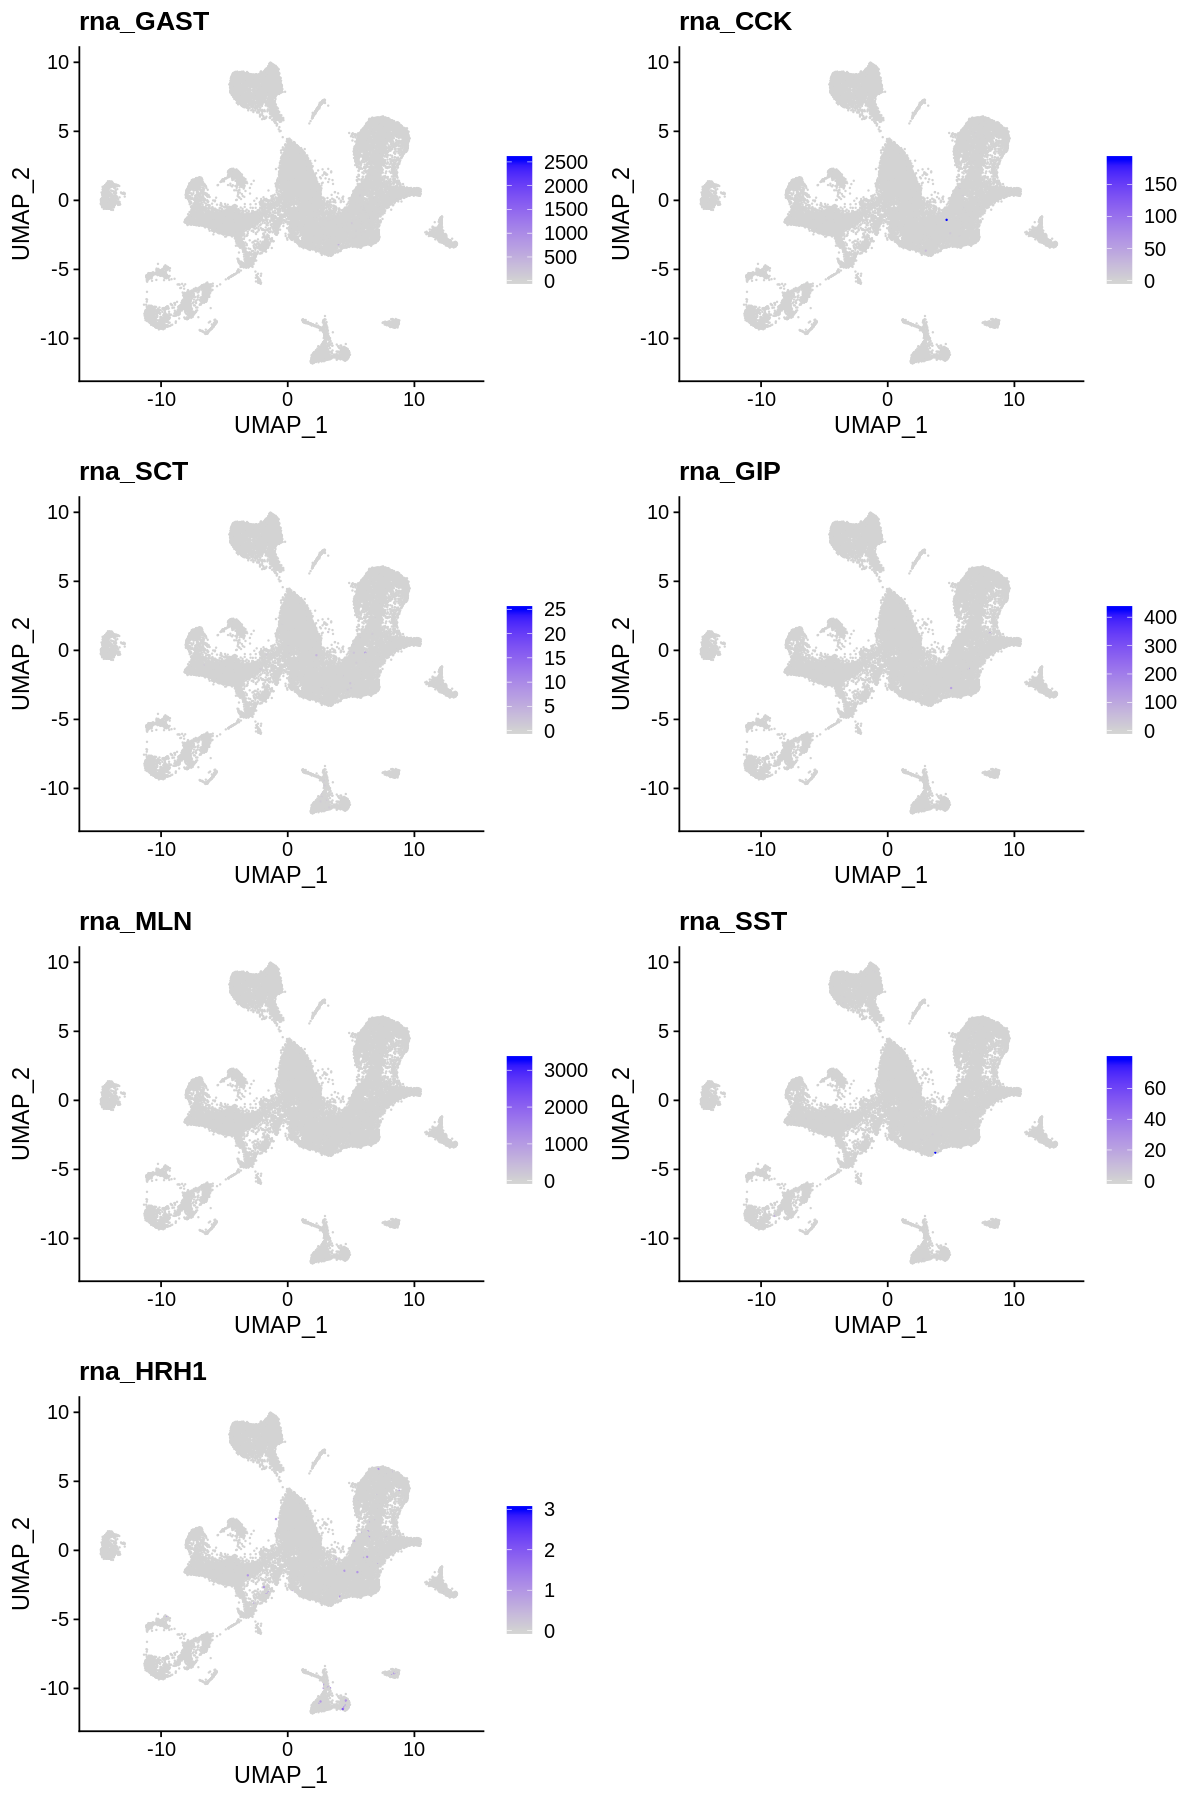

In [30]:
#endocrine
options(repr.plot.width=10, repr.plot.height=15)
FeaturePlot(object = data.integrated, features = c("rna_GAST","rna_CCK","rna_SCT","rna_GIP","rna_MLN","rna_SST","rna_HRH1"), ncol = 2)

In [56]:
all.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC) %>% filter(cluster==4) %>% select(gene)

Adding missing grouping variables: `cluster`


cluster gene   
1  4       MT-CO3 
2  4       MT-CO1 
3  4       MT-CO2 
4  4       MT-ND1 
5  4       MT-ATP6
6  4       MT-ND4 
7  4       MT-CYB 
8  4       MT-ND3 
9  4       MT-ND2 
10 4       PIGR

In [89]:
all.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC) %>% filter(cluster==32) %>% select(gene)

Adding missing grouping variables: `cluster`


cluster gene    
1 32      IGLC7   
2 32      SSR4    
3 32      JCHAIN  
4 32      TNFRSF17
5 32      XBP1    
6 32      MZB1    
7 32      FKBP11  
8 32      CD79A   
9 32      IGHM

In [42]:
save(all.markers, file = "NewData_Normal_Total_gastric_all_markers.RData")

In [93]:
# 最下部Memoより上皮細胞と思われるもの＋なにかわからないものだけ取り出す
stomach_epithelial <- subset(x=data.integrated, idents=c(3,4,8,9,16,17,23))

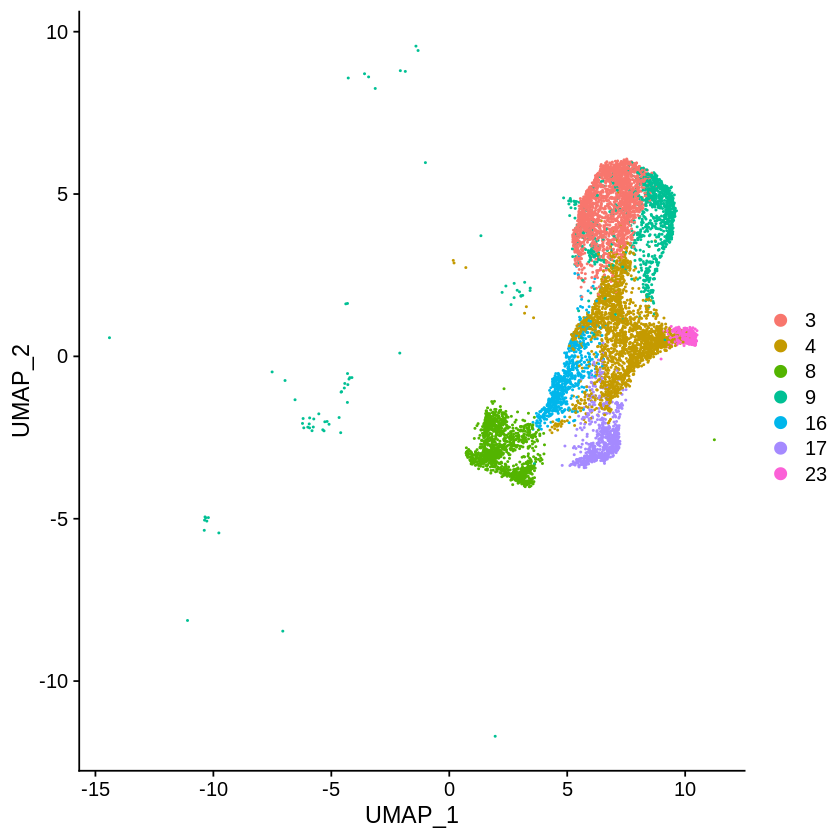

In [94]:
p2 <- DimPlot(object = stomach_epithelial)
plot(p2)

In [ ]:
save(stomach_epithelial, file='NewData_Normal_Total_epithelial_only.RData')

# Memo
# 各クラスター推定
### #0: 
### #1: CD20(+) -> B cell
### #2: Plasma cell 
### #3: stomach epithelial cell
### #4: ゴミ？
### #5: T cell
### #6: T cell前駆？？　
### #7: NK cell or CD8 T cell
### #8: いつも出てくるよくわからない免疫細胞
### #9: stomach epithelial cell
### #10: plasma cell 
### #11: plasma cell
### #12: fibroblast
### #13: plasma cell
### #14: myeloid cell?
### #15: myeloid or T cell
### #16: stomach epithelial cell
### #17: stomach epithelial cell
### #18: plasma cell
### #19: plasma cell
### #20: 血液系っぽいが・・・
### #21: plasma cell
### #22: smooth muscle cell
### #23: ごみ？　
### #24: plasma cell
### #25: adipocyte or smooth muscle cell
### #26: hemoglobin -> RBC??
### #27: ckit陽性???, mast cell???
### #28: mesenchymal cell
### #29: plasma cell
### #30: plasma cell
### #31: plasma cell
### #32: plasma cell or dendric cell?